# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"] )

# Display the data table for preview
mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mice_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate_array = mice_df.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)
mice_duplicates = mice_df[mice_duplicate_array]
mice_duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = mice_df.loc[mice_df["Mouse ID"] != "g989", :]
mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mice_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mice_tum_gr = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
mice_tum_mean = mice_tum_gr.mean()
mice_tum_med = mice_tum_gr.median()
mice_tum_var = mice_tum_gr.var()
mice_tum_std = mice_tum_gr.std()
mice_tum_sem = mice_tum_gr.sem()

mice_tumorvol_df = pd.DataFrame({"Mean Tumor Volume": mice_tum_mean,
                                "Median Tumor Volume": mice_tum_med,
                                "Tumor Volume Variance": mice_tum_var,
                                "Tumor Volume Std. Dev.": mice_tum_std,
                                "Tumor Volume Std. Err.": mice_tum_sem})
mice_tumorvol_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
import numpy as np
# Using the aggregation method, produce the same summary statistics in a single line
mice_tumorvol_df_2 = mice_tum_gr.agg([np.mean,np.median,np.var,np.std,st.sem])
mice_tumorvol_df_2.rename(columns={"mean": "Mean Tumor Volume",
                                  "median": "Median Tumor Volume",
                                  "var": "Tumor Volume Variance",
                                  "std": "Tumor Volume Std. Dev.",
                                  "sem": "Tumor Volume Std. Err."})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

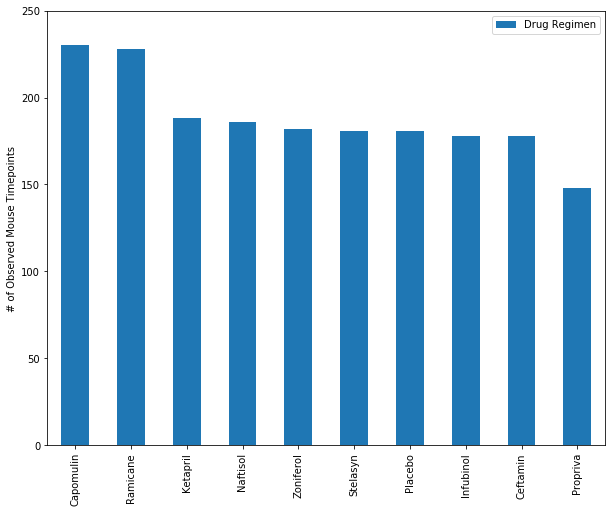

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drugreg = pd.DataFrame(mice_df["Drug Regimen"].value_counts())

ax = mice_drugreg.plot(kind="bar", figsize=(10,8))
ax.set(ylabel="# of Observed Mouse Timepoints",ylim = (0,250))
plt.show()

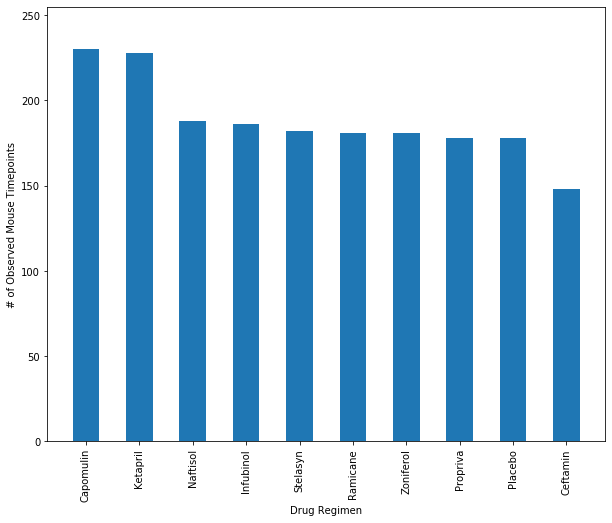

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_count = mice_df["Drug Regimen"].value_counts()

fig, ax = plt.subplots()
ax.bar(mice_df["Drug Regimen"].unique(), mice_df["Drug Regimen"].value_counts(), width=.5)
ax.set(xlabel = 'Drug Regimen', ylabel='# of Observed Mouse Timepoints', ylim=(0, max(mice_df["Drug Regimen"].value_counts()) + 25))
ax.tick_params(axis='x',labelrotation=90)
fig.set_size_inches(10,8)
plt.show()

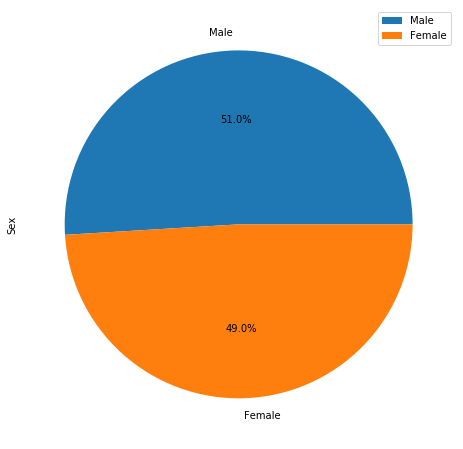

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distr = pd.DataFrame(mice_df["Sex"].value_counts())
sex_distr.plot(kind="pie", subplots=True, autopct="%1.1f%%", figsize=(10,8))
plt.show()

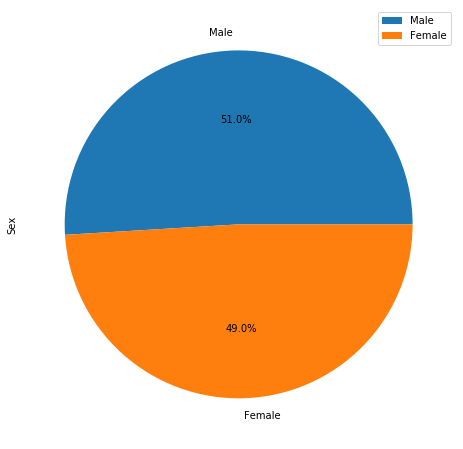

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distr = mice_df["Sex"].value_counts()
plt.pie(sex_distr, labels = sex_distr.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tp_max_df = pd.DataFrame(mice_df.groupby(["Mouse ID"])["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_tpmax_df = pd.merge(tp_max_df, mice_df, on=["Mouse ID","Mouse ID","Timepoint","Timepoint"], how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []

    # Locate the rows which contain mice on each drug and get the tumor volumes
tum_vol = [mice_tpmax_df.loc[mice_tpmax_df["Drug Regimen"] == treatments[i],:]["Tumor Volume (mm3)"] for i in range(len(treatments))]
         
    # add subset 
subset = [tum_vol[0], tum_vol[1], tum_vol[2], tum_vol[3]]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile_list = [subset[i].quantile([.25,.5,.75]) for i in range(len(subset))]
lq = [quartile_list[i][.25] for i in range(len(quartile_list))]
uq = [quartile_list[i][.75] for i in range(len(quartile_list))]
IQR = [uq[i]-lq[i] for i in range(len(quartile_list))]
    # Determine outliers using upper and lower bounds
LB = [lq[i] - 1.5*IQR[i] for i in range(len(quartile_list))]
UB = [uq[i] + 1.5*IQR[i] for i in range(len(quartile_list))]

for i in range(len(subset)):
    for j in subset[i]:
        if j > UB[i] or j < LB[i]:
            print(f'Value {j} is an outlier for {treatments[i]}')

Value 36.321345799999996 is an outlier for Infubinol


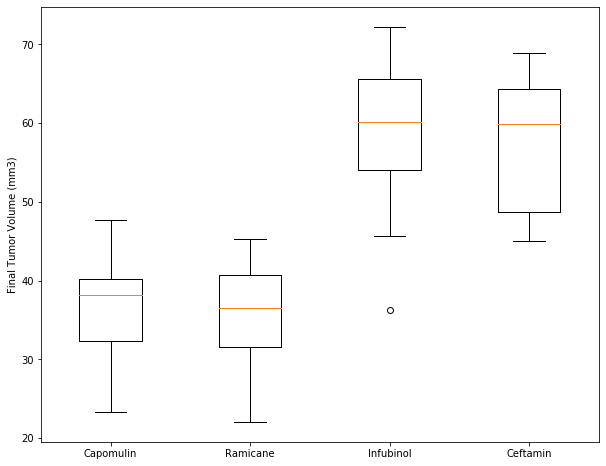

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(treatments)
ax.boxplot(tum_vol)
fig.set_size_inches(10,8)
plt.show()

## Line and Scatter Plots

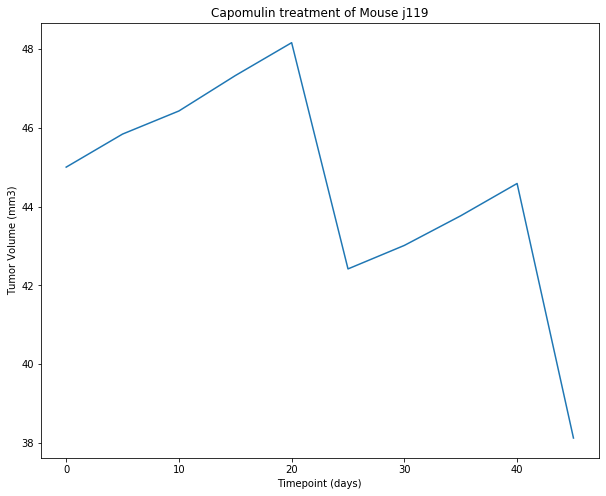

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
rand_mouse = mice_df.loc[mice_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].sample(1).values
tp_tv_df = mice_df.loc[mice_df['Mouse ID'] == rand_mouse[0]][["Timepoint", "Tumor Volume (mm3)"]]

fig, ax = plt.subplots()
plt.plot(tp_tv_df["Timepoint"], tp_tv_df["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of Mouse {rand_mouse[0]}")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
fig.set_size_inches(10, 8)
plt.show()

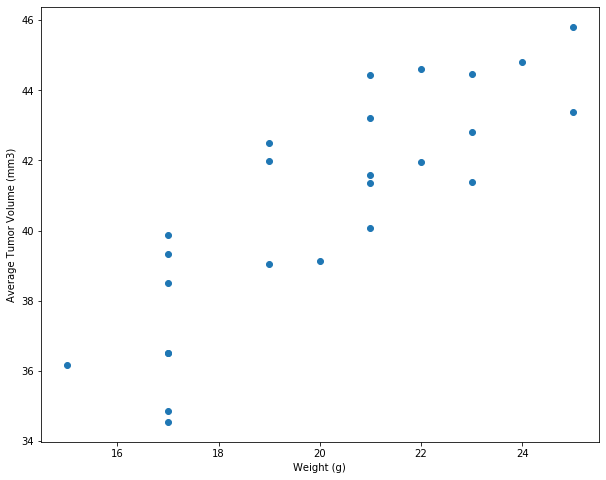

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
g_tumvol_gr = mice_df.loc[mice_df["Drug Regimen"] == "Capomulin",:].groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()

x_val = [float(i[1]) for i in g_tumvol_gr.index.values]
y_val = g_tumvol_gr.values

fig, ax = plt.subplots()
plt.scatter(x_val, y_val)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
fig.set_size_inches(10,8)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


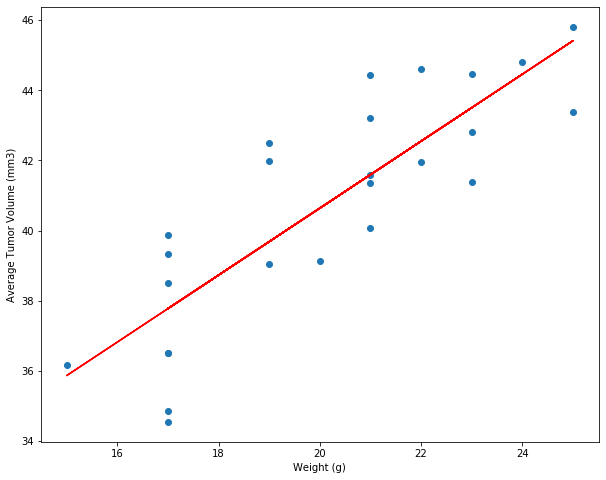

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

correlation = st.pearsonr(x_val, y_val)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

fig, ax = plt.subplots()
plt.scatter(x_val, y_val)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = [i * slope + intercept for i in x_val]
plt.plot(x_val,regress_values,"r-")
fig.set_size_inches(10,8)
plt.show()